<a href="https://www.kaggle.com/nikhilsatani/petfinder?scriptVersionId=84276404" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('../input/petfinder-pawpularity-score/train.csv')
test = pd.read_csv('../input/petfinder-pawpularity-score/test.csv')

In [3]:
train.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


In [4]:
test.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
0,4128bae22183829d2b5fea10effdb0c3,1,0,1,0,0,1,1,0,0,1,0,1
1,43a2262d7738e3d420d453815151079e,0,1,0,0,0,0,1,1,0,0,0,0
2,4e429cead1848a298432a0acad014c9d,0,0,0,1,0,1,1,1,0,1,1,1
3,80bc3ccafcc51b66303c2c263aa38486,1,0,1,0,0,0,0,0,0,0,1,0
4,8f49844c382931444e68dffbe20228f4,1,1,1,0,1,1,0,1,0,1,1,0


In [5]:
train.info

<bound method DataFrame.info of                                     Id  Subject Focus  Eyes  Face  Near  \
0     0007de18844b0dbbb5e1f607da0606e0              0     1     1     1   
1     0009c66b9439883ba2750fb825e1d7db              0     1     1     0   
2     0013fd999caf9a3efe1352ca1b0d937e              0     1     1     1   
3     0018df346ac9c1d8413cfcc888ca8246              0     1     1     1   
4     001dc955e10590d3ca4673f034feeef2              0     0     0     1   
...                                ...            ...   ...   ...   ...   
9907  ffbfa0383c34dc513c95560d6e1fdb57              0     0     0     1   
9908  ffcc8532d76436fc79e50eb2e5238e45              0     1     1     1   
9909  ffdf2e8673a1da6fb80342fa3b119a20              0     1     1     1   
9910  fff19e2ce11718548fa1c5d039a5192a              0     1     1     1   
9911  fff8e47c766799c9e12f3cb3d66ad228              0     1     1     1   

      Action  Accessory  Group  Collage  Human  Occlusion  Info  Bl

In [6]:
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

In [7]:
train.head()

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0,1,1,1,0,0,0,0,0,0,0,0,15
4,0,0,0,1,0,0,1,0,0,0,0,0,72


In [8]:
y, X = train['Pawpularity'], train.drop('Pawpularity', axis=1)

In [9]:
X.shape

(9912, 12)

In [10]:
test.shape

(8, 12)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

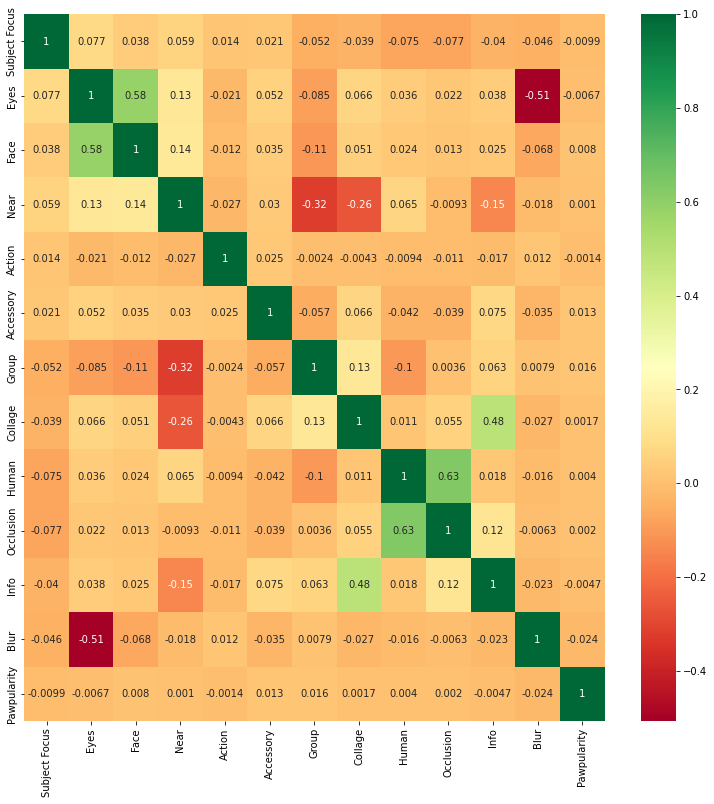

In [12]:
corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(13, 13))
g = sns.heatmap(train[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [13]:
from catboost import CatBoostRegressor

In [14]:
model = CatBoostRegressor()

In [15]:
from sklearn.model_selection import GridSearchCV

parameters = {'depth' : [6, 8, 10],
             'learning_rate' : [0.01, 0.05, 0.1],
             'iterations' : [30, 50, 100]}

grid = GridSearchCV(estimator=model, param_grid=parameters, cv=2, n_jobs=-1)


In [16]:
grid.fit(X, y)

0:	learn: 20.4799156	total: 57.1ms	remaining: 1.66s
1:	learn: 20.4783607	total: 58.7ms	remaining: 821ms
2:	learn: 20.4782777	total: 61.5ms	remaining: 553ms
3:	learn: 20.4759975	total: 66.5ms	remaining: 432ms
4:	learn: 20.4744274	total: 72.3ms	remaining: 362ms
5:	learn: 20.4726796	total: 73.9ms	remaining: 296ms
6:	learn: 20.4712902	total: 75.4ms	remaining: 248ms
7:	learn: 20.4697471	total: 81.2ms	remaining: 223ms
8:	learn: 20.4676018	total: 91.4ms	remaining: 213ms
9:	learn: 20.4659554	total: 92.8ms	remaining: 186ms
10:	learn: 20.4648316	total: 102ms	remaining: 175ms
11:	learn: 20.4631565	total: 107ms	remaining: 160ms
12:	learn: 20.4622144	total: 114ms	remaining: 149ms
13:	learn: 20.4601436	total: 116ms	remaining: 132ms
14:	learn: 20.4591464	total: 119ms	remaining: 119ms
15:	learn: 20.4584003	total: 120ms	remaining: 105ms
16:	learn: 20.4569432	total: 127ms	remaining: 97ms
17:	learn: 20.4549063	total: 133ms	remaining: 88.7ms
18:	learn: 20.4531520	total: 134ms	remaining: 77.9ms
19:	learn: 

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostRegressor object at 0x7f9ee1507a90>,
             n_jobs=-1,
             param_grid={'depth': [6, 8, 10], 'iterations': [30, 50, 100],
                         'learning_rate': [0.01, 0.05, 0.1]})

In [17]:
prediction = grid.predict(test)

In [18]:
solution = pd.read_csv('../input/petfinder-pawpularity-score/sample_submission.csv')

In [19]:
solution.head()

,Id,Pawpularity
0,4128bae22183829d2b5fea10effdb0c3,67.75
1,43a2262d7738e3d420d453815151079e,59.15
2,4e429cead1848a298432a0acad014c9d,20.02
3,80bc3ccafcc51b66303c2c263aa38486,94.53
4,8f49844c382931444e68dffbe20228f4,89.82


In [20]:
solution['Pawpularity'] = prediction

In [21]:
solution.head()

,Id,Pawpularity
0,4128bae22183829d2b5fea10effdb0c3,38.248664
1,43a2262d7738e3d420d453815151079e,37.743060
2,4e429cead1848a298432a0acad014c9d,37.598518
3,80bc3ccafcc51b66303c2c263aa38486,37.096075
4,8f49844c382931444e68dffbe20228f4,37.496754


In [22]:
solution.to_csv('submission.csv', index=False)

In [23]:
solution.head()

,Id,Pawpularity
0,4128bae22183829d2b5fea10effdb0c3,38.248664
1,43a2262d7738e3d420d453815151079e,37.743060
2,4e429cead1848a298432a0acad014c9d,37.598518
3,80bc3ccafcc51b66303c2c263aa38486,37.096075
4,8f49844c382931444e68dffbe20228f4,37.496754
